# California Housing Dataset

In [2]:
import sys
import pandas as pd
import numpy as np

import tensorflow as tf
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid", {"axes.facecolor": ".95"})
sns.set_context("paper")

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

## Creating the model

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_train_full)

Epoch 1/15
363/363 [==============================] - 0s 799us/step - loss: 1.9605 - val_loss: 1.1453
Epoch 2/15
363/363 [==============================] - 0s 660us/step - loss: 0.7260 - val_loss: 0.7875
Epoch 3/15
363/363 [==============================] - 0s 665us/step - loss: 0.6678 - val_loss: 0.7024
Epoch 4/15
363/363 [==============================] - 0s 668us/step - loss: 0.6318 - val_loss: 0.5938
Epoch 5/15
363/363 [==============================] - 0s 684us/step - loss: 0.6035 - val_loss: 0.5673
Epoch 6/15
363/363 [==============================] - 0s 669us/step - loss: 0.5759 - val_loss: 0.6026
Epoch 7/15
363/363 [==============================] - 0s 660us/step - loss: 0.5583 - val_loss: 0.5512
Epoch 8/15
363/363 [==============================] - 0s 668us/step - loss: 0.5405 - val_loss: 0.5455
Epoch 9/15
363/363 [==============================] - 0s 690us/step - loss: 0.5227 - val_loss: 0.5078
Epoch 10/15
363/363 [==============================] - 0s 665us/step - loss: 0.509

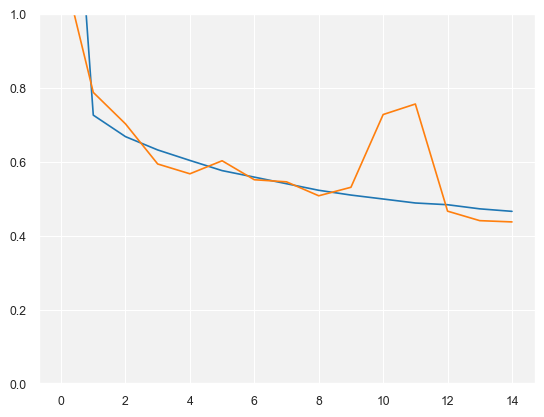

In [44]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [45]:
df_housing = pd.DataFrame(data=X_train_full, columns=housing.feature_names)

df_housing[housing.target_names[0]] = y_train_full
df_housing['prediction'] = y_pred

df_housing.sample(15)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction
6219,10.9891,4.0,6.296296,0.851852,93.0,3.444444,39.00,-121.00,3.125,92.524353
12669,4.8051,21.0,5.857143,1.053391,1874.0,2.704185,39.00,-121.04,1.743,330.887085
2123,3.4167,35.0,4.583333,1.164062,984.0,2.562500,34.15,-118.12,1.982,217.829834
11597,2.6518,40.0,3.967105,1.039474,826.0,1.811404,32.76,-117.15,1.798,200.246429
5142,4.1250,36.0,5.587500,0.990625,1139.0,3.559375,34.08,-117.93,1.858,238.217255
12823,3.5517,42.0,4.884273,1.057864,2224.0,3.299703,34.05,-118.32,2.915,385.514771
2541,2.1289,52.0,3.021173,0.995114,1715.0,2.793160,37.75,-122.42,2.500,320.604553
14627,3.7625,10.0,8.442105,1.852632,540.0,2.842105,38.94,-120.72,1.132,147.016815
8630,4.8536,23.0,5.554455,1.029703,1984.0,2.806223,34.37,-118.56,2.026,348.752197
6393,2.3523,28.0,5.206897,1.000000,535.0,2.306034,37.77,-120.86,0.947,156.015015
